In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8) # não sei o motivo, mas o use acima reseta o size.

In [2]:
ANO = 2019

In [3]:
dados_acoes = pd.read_csv("dados_acoes.csv").set_index("Date")
dados_acoes = dados_acoes[f"{ANO}-01-01":"2021-07-13"].fillna(method="ffill")
dados_acoes.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BOVA11,BRML3,CIEL3,CMIG4,...,LAME4,LREN3,MGLU3,MULT3,PETR4,PRIO3,UGPA3,USIM5,VALE3,VVAR3
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,15.258595,8.481046,42.239235,22.016506,27.039375,23.512794,87.900002,12.521657,8.763200,10.641972,...,19.130808,37.888344,5.641579,24.063623,22.526630,2.0712,25.573843,9.451055,44.829338,4.38
2019-01-03,15.428659,8.850316,42.413063,22.476667,27.312134,23.770172,88.000000,12.605382,8.553904,10.418713,...,19.072599,37.409847,5.581216,24.237436,23.079029,2.0758,25.098511,9.247702,42.995453,4.31
2019-01-04,15.636516,8.529873,42.413063,21.984024,27.097815,23.537703,88.500000,12.363507,9.236394,10.314527,...,18.830070,35.974354,5.411354,23.744965,23.144567,2.0932,24.929083,9.789974,45.794544,4.27
2019-01-07,15.570379,8.484097,42.134941,22.168762,27.419289,23.188993,88.480003,12.289084,9.154496,10.009407,...,19.458136,35.147854,5.495374,23.406992,23.509716,2.0914,24.166668,9.809342,45.548859,4.24
2019-01-08,15.258595,8.508512,41.656933,22.415087,27.586721,22.848591,88.830002,12.307691,8.845098,9.957314,...,19.487350,36.278854,5.451088,23.242832,23.369276,2.1414,23.766638,9.535276,45.987583,4.04


In [4]:
dados_cripto = pd.read_csv("dados_criptos.csv").set_index("Date")
dados_cripto = dados_cripto[f"{ANO}-01-01":"2021-07-13"].fillna(method="bfill")
dados_cripto.head()

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DCR-USD,DOGE-USD,EOS-USD,ETC-USD,ETH-USD,FIL-USD,...,NEO-USD,REP-USD,THETA-USD,TRX-USD,VET-USD,WAVES-USD,XLM-USD,XMR-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.042547,164.854599,6.075273,3843.520020,17.464001,0.002392,2.663533,5.227261,140.819412,3.016652,...,7.866171,8.195203,0.049690,0.019561,0.004145,3.162524,0.115930,48.367496,0.364771,0.474699
2019-01-02,0.045258,171.827377,6.188613,3943.409424,18.415791,0.002407,2.887629,5.438700,155.047684,3.344247,...,8.076462,8.868501,0.050489,0.020222,0.004231,3.153164,0.119331,52.252449,0.375243,0.485319
2019-01-03,0.042682,162.049927,5.903535,3836.741211,18.236917,0.002360,2.681411,5.094617,149.135010,3.337603,...,7.679240,8.638993,0.052906,0.020088,0.004051,3.103900,0.113825,49.815357,0.360224,0.482134
2019-01-04,0.043812,161.395630,6.065138,3857.717529,18.562626,0.002315,2.721645,5.254148,154.581940,3.461010,...,7.634589,9.245858,0.051363,0.021492,0.004094,3.086819,0.115361,50.630875,0.356747,0.483029
2019-01-05,0.044701,160.401215,6.065543,3845.194580,18.490410,0.002319,2.699468,5.136273,155.638596,3.208686,...,7.844755,9.298466,0.050197,0.022294,0.004074,3.073536,0.114046,49.931812,0.355275,0.483224


In [5]:
dados = dados_acoes.join(dados_cripto)
dados.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BOVA11,BRML3,CIEL3,CMIG4,...,NEO-USD,REP-USD,THETA-USD,TRX-USD,VET-USD,WAVES-USD,XLM-USD,XMR-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,15.258595,8.481046,42.239235,22.016506,27.039375,23.512794,87.900002,12.521657,8.763200,10.641972,...,8.076462,8.868501,0.050489,0.020222,0.004231,3.153164,0.119331,52.252449,0.375243,0.485319
2019-01-03,15.428659,8.850316,42.413063,22.476667,27.312134,23.770172,88.000000,12.605382,8.553904,10.418713,...,7.679240,8.638993,0.052906,0.020088,0.004051,3.103900,0.113825,49.815357,0.360224,0.482134
2019-01-04,15.636516,8.529873,42.413063,21.984024,27.097815,23.537703,88.500000,12.363507,9.236394,10.314527,...,7.634589,9.245858,0.051363,0.021492,0.004094,3.086819,0.115361,50.630875,0.356747,0.483029
2019-01-07,15.570379,8.484097,42.134941,22.168762,27.419289,23.188993,88.480003,12.289084,9.154496,10.009407,...,8.471042,9.395186,0.051540,0.023601,0.004176,2.951987,0.123220,52.826897,0.364347,0.481431
2019-01-08,15.258595,8.508512,41.656933,22.415087,27.586721,22.848591,88.830002,12.307691,8.845098,9.957314,...,9.175762,10.048374,0.050526,0.026336,0.004382,2.887409,0.123119,53.155445,0.365315,0.484993


In [6]:
retornos_acoes = dados_acoes.pct_change().dropna()
retornos_cripto = dados_cripto.pct_change().dropna()

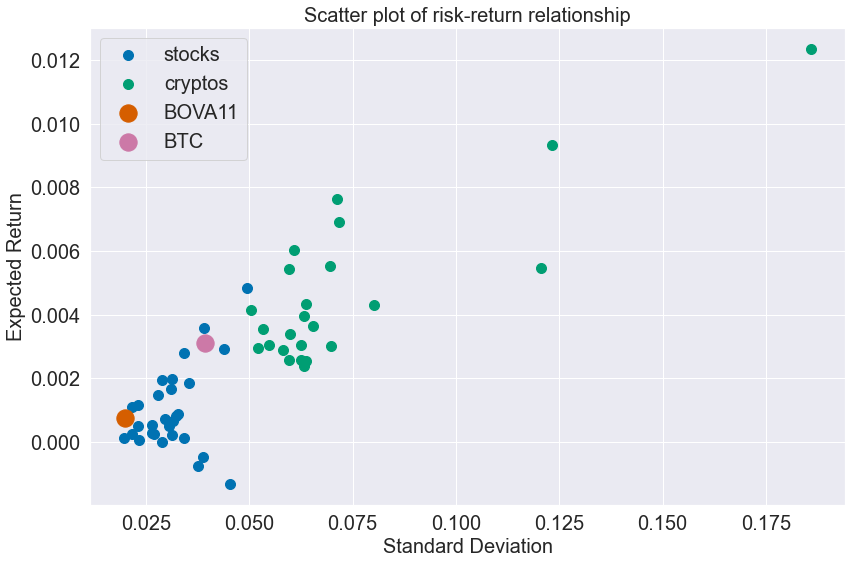

In [7]:
plt.scatter(retornos_acoes.std(), retornos_acoes.mean(), s=100)
plt.scatter(retornos_cripto.std(), retornos_cripto.mean(), s=100)
plt.scatter(retornos_acoes.std()['BOVA11'], retornos_acoes.mean()['BOVA11'], s=300)
plt.scatter(retornos_cripto.std()['BTC-USD'], retornos_cripto.mean()['BTC-USD'],s=300)
plt.ylabel("Expected Return")
plt.xlabel("Standard Deviation")
plt.title("Scatter plot of risk-return relationship")
plt.legend(["stocks", "cryptos", "BOVA11", "BTC"])
plt.tight_layout()
plt.savefig(f"graficos/scatter_plot_{ANO}.png")

In [8]:
N = 252 # 252 trading days in a year
rf = 0.025 # 3.75% risk free rate

In [9]:
def sharpe_ratio(data, N, rf):
    returns = data.pct_change()
    mean = returns.mean() - (math.pow(1+rf, 1/N)-1)
    sigma = returns.std()
    return mean / sigma

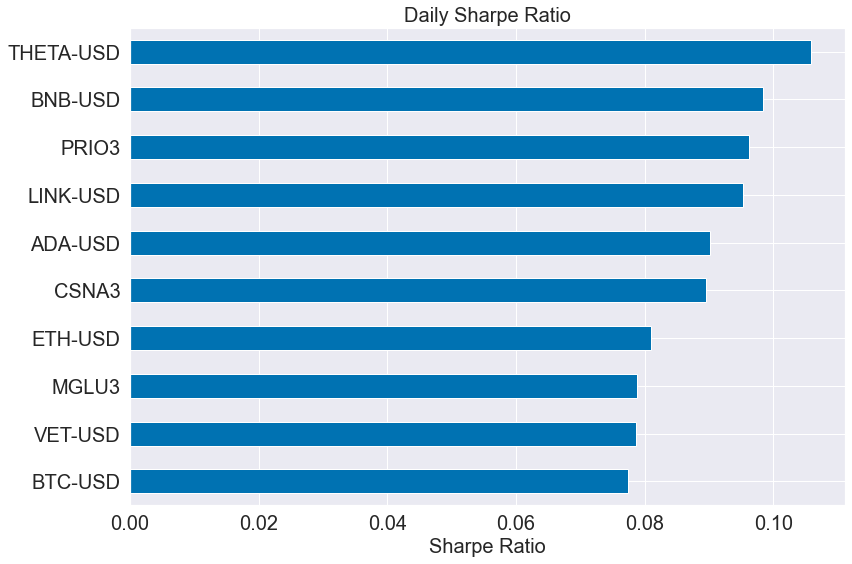

In [10]:
sharpes_acoes = dados_acoes.apply(sharpe_ratio, args = (N, rf, ), axis = 0)
sharpes_criptos = dados_cripto.apply(sharpe_ratio, args = (365, rf, ), axis = 0)
sharpes = pd.concat([sharpes_acoes, sharpes_criptos])
sharpes.sort_values()[-10:].plot.barh()
plt.xlabel('Sharpe Ratio')
plt.title("Daily Sharpe Ratio")
plt.tight_layout()
plt.savefig(f"graficos/sharpes_{ANO}.png")

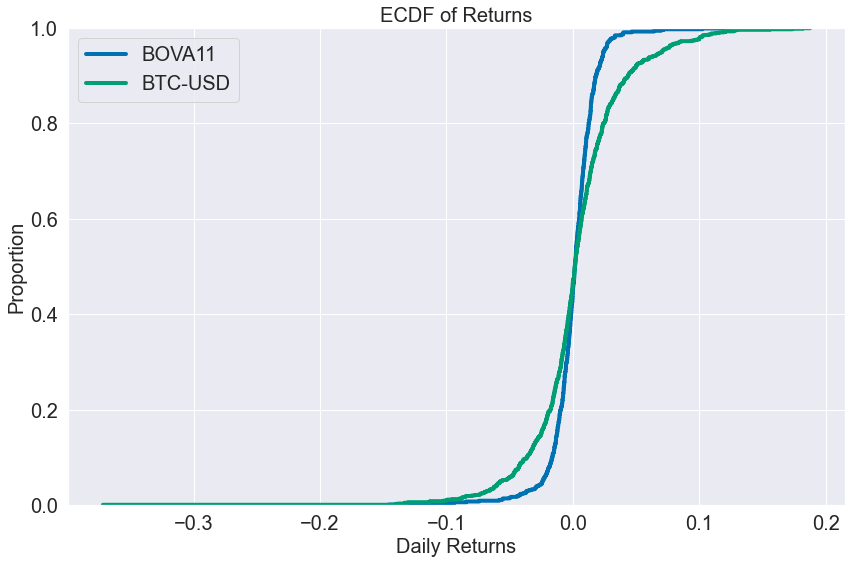

In [11]:
sns.ecdfplot(retornos_acoes['BOVA11'])
sns.ecdfplot(retornos_cripto['BTC-USD'])
plt.legend(labels=["BOVA11", "BTC-USD"])
plt.title("ECDF of Returns")
plt.xlabel("Daily Returns")
plt.tight_layout()
plt.savefig(f"graficos/ecdf_{ANO}.png")

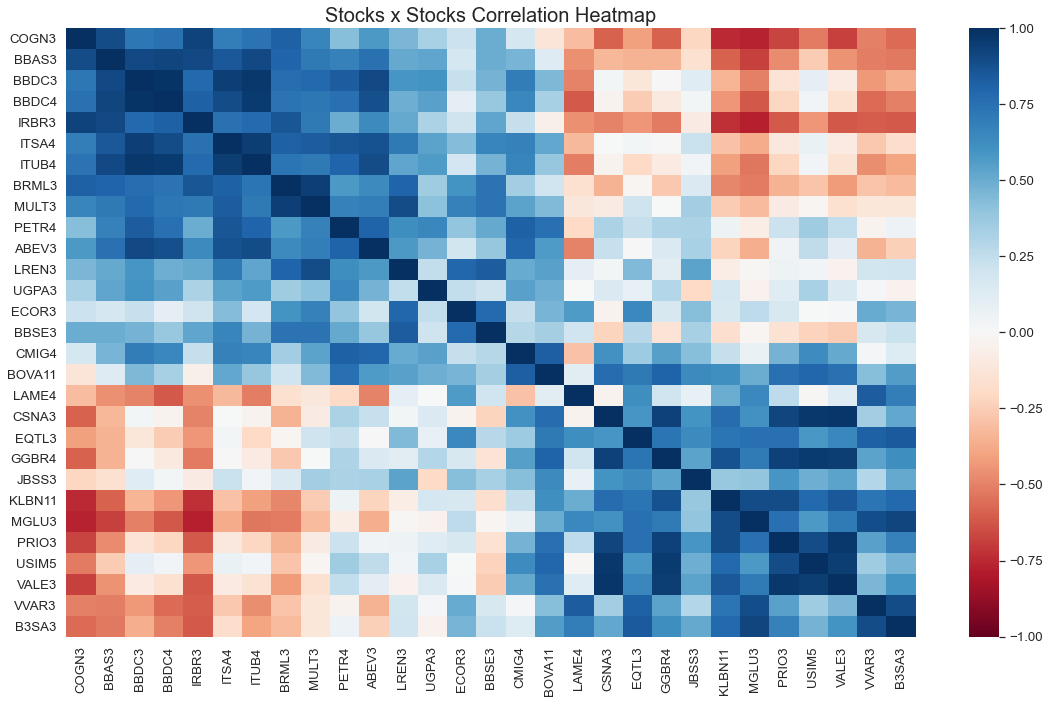

In [12]:
corr_matrix = dados.corr()
ordem_acoes = ["COGN3", "BBAS3", "BBDC3", "BBDC4", "IRBR3", "ITSA4", "ITUB4", "BRML3", "MULT3", "PETR4", "ABEV3", "LREN3", "UGPA3", 
                "ECOR3", "BBSE3", "CMIG4", "BOVA11", "LAME4", "CSNA3", "EQTL3", "GGBR4", "JBSS3", "KLBN11", "MGLU3", "PRIO3", "USIM5", "VALE3", "VVAR3", "B3SA3"]
sns.set(font_scale=1.2)
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix.loc[ordem_acoes, ordem_acoes], cmap="RdBu", vmin=-1, vmax=1).set_title("Stocks x Stocks Correlation Heatmap", fontsize=20)
plt.tight_layout()
plt.savefig("graficos/corr_stocks_stocks.png")

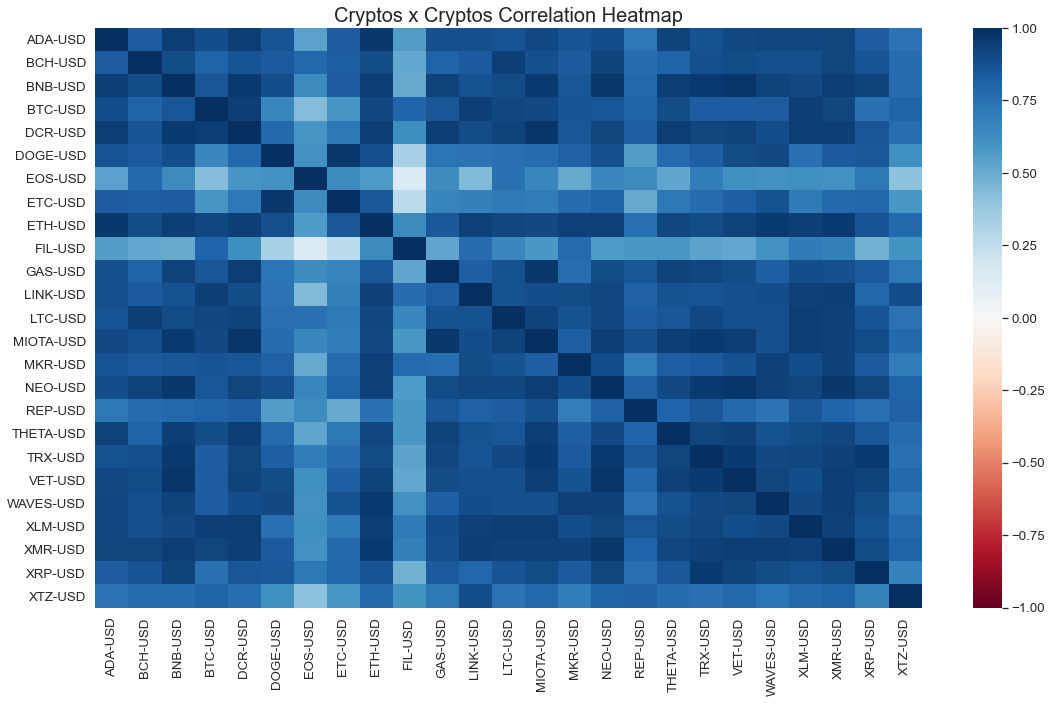

In [13]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix.loc["ADA-USD":, "ADA-USD":], cmap="RdBu", vmin=-1, vmax=1).set_title("Cryptos x Cryptos Correlation Heatmap", fontsize=20)
plt.tight_layout()
plt.savefig("graficos/corr_cryptos_cryptos.png")

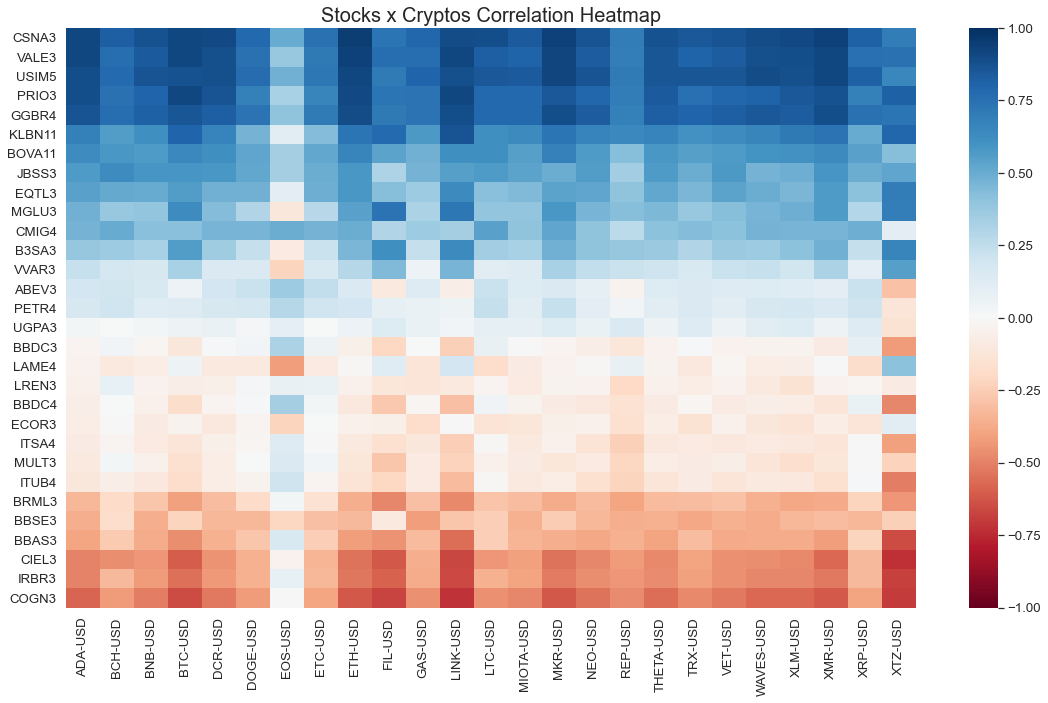

In [14]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix.loc["ABEV3":"VVAR3":, "ADA-USD":].sort_values(by=["ADA-USD"], ascending=False), cmap="RdBu", vmin=-1, vmax=1).set_title("Stocks x Cryptos Correlation Heatmap", fontsize=20)
plt.tight_layout()
plt.savefig("graficos/corr_stocks_cryptos.png")

In [29]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

df = dados
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [30]:
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

Expected annual return: 369.9%
Annual volatility: 75.0%
Sharpe Ratio: 4.91


OrderedDict([('ABEV3', 0.0),
             ('B3SA3', 0.0),
             ('BBAS3', 0.0),
             ('BBDC3', 0.0),
             ('BBDC4', 0.0),
             ('BBSE3', 0.0),
             ('BOVA11', 0.0),
             ('BRML3', 0.0),
             ('CIEL3', 0.0),
             ('CMIG4', 0.0),
             ('COGN3', 0.0),
             ('CSNA3', 0.1412522728422994),
             ('ECOR3', 0.0),
             ('EQTL3', 0.0),
             ('GGBR4', 0.0),
             ('IRBR3', 0.0),
             ('ITSA4', 0.0),
             ('ITUB4', 0.0),
             ('JBSS3', 0.0),
             ('KLBN11', 0.0),
             ('LAME4', 0.0),
             ('LREN3', 0.0),
             ('MGLU3', 0.0),
             ('MULT3', 0.0),
             ('PETR4', 0.0),
             ('PRIO3', 0.1657302133280142),
             ('UGPA3', 0.0),
             ('USIM5', 0.0),
             ('VALE3', 0.0),
             ('VVAR3', 0.0),
             ('ADA-USD', 0.0),
             ('BCH-USD', 0.0),
             ('BNB-USD', 0.177482716

<AxesSubplot:>

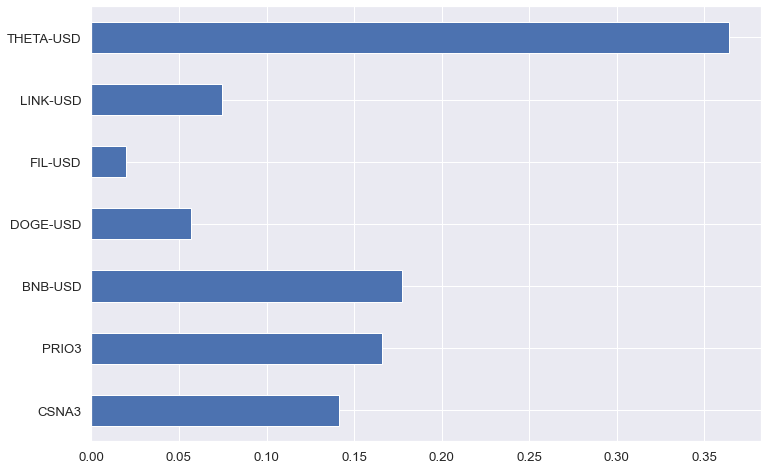

In [31]:
from collections import OrderedDict

new_weights = OrderedDict()
for ticker in raw_weights:
  if raw_weights[ticker] != 0:
    new_weights[ticker] = raw_weights[ticker]

pd.Series(new_weights).plot.barh()